In [ ]:
# the most coarse grained model
# state transition/Marcov model (maybe)
#

In [2]:
import pickle
import gzip
import matplotlib.pyplot as plt
import random
import warnings
import datafunctions
import definitions_2018 as bd
import displayfunctions as bp

datafunctions.init(bd) 
bp.init(bd)

warnings.filterwarnings("ignore")

d:\desk\github_related\honey-bee-behavior\foraging_model\definitions_2018.py:20: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  cohort_birthdates = np.array([pd.Timestamp(np.array(cohort_data['DOB'][cohort_data['cohort']==c])[0],freq='D') for c in cohort_colornames])


In [7]:
comb_contents_dir="../../comb-contents-images/"
daynum=0
comb1 = pickle.load(gzip.open(comb_contents_dir+'comb_00'+'.pklz','rb'))
comb2 = pickle.load(gzip.open(comb_contents_dir+'comb_03'+'.pklz','rb'))

Colors denote the different comb areas
Green – empty comb
Blue – brood
Dark blue – capped brood (we can/should probably just group all brood into one group)
Yellow – honey
Orange – pollen
Grey – peripheral galleries
Brown – wooden frames
Pink circles – dances observed during tracing (the general area is the dancefloor)


In [16]:
comb1.getsubstrate(0,100,100)

[6.0]

In [2]:
import pandas as pd
import numpy as np

In [11]:
df1min_dir="../../df_day1min_alldays/"
df=pd.read_hdf(df1min_dir+"df_day1min_49.hdf")

In [73]:
df.columns

Index(['Age', 'Num. observations', 'Honey', 'Brood care', 'Pollen',
       'Dance floor', 'Other', 'Frame 0', 'Frame 1', 'Frame 2', 'Frame 3',
       'Frame 4', 'Frame 5', 'Median speed', 'Speed IQR',
       'Speed 90th quantile', 'Dispersion (avg)', 'Exit distance (median)',
       'Fraction squares visited', 'Day number', 'Festoon', 'Empty comb',
       'blank1', 'blank2', 'Bee unique ID', 'Cohort ID', 'Num. outside trips',
       'Num. dance floor visits', 'Dispersion-minute avg.',
       'Frame 0 - Num. crossings', 'Frame 1 - Num. crossings',
       'Frame 2 - Num. crossings', 'Frame 3 - Num. crossings',
       'Frame 4 - Num. crossings', 'Frame 5 - Num. crossings', 'timedivision'],
      dtype='object')

In [12]:
df[df['timedivision']==1435][['Num. observations', 'Bee unique ID', 'timedivision','Honey', 'Brood care', 'Pollen',
       'Dance floor', 'Other']].dropna()

,Num. observations,Bee unique ID,timedivision,Honey,Brood care,Pollen,Dance floor,Other
1927228,180.0,2901.0,1435.0,0.000000,0.000000,0.000000,0.0,1.000000e+00
1927234,102.0,2968.0,1435.0,0.000000,0.000000,0.000000,1.0,0.000000e+00
1927246,49.0,3114.0,1435.0,0.673469,0.000000,0.000000,0.0,3.265306e-01
1927281,169.0,3210.0,1435.0,1.000000,0.000000,0.000000,0.0,0.000000e+00
1927291,57.0,3255.0,1435.0,0.000000,0.000000,0.000000,1.0,1.246566e-16
...,...,...,...,...,...,...,...,...
1928510,76.0,5302.0,1435.0,0.178571,0.526316,0.058897,0.0,2.362155e-01
1928528,120.0,5322.0,1435.0,0.840079,0.000000,0.000000,0.0,1.599206e-01
1928533,180.0,5328.0,1435.0,1.000000,0.000000,0.000000,0.0,0.000000e+00
1928538,180.0,5333.0,1435.0,0.000000,0.000000,0.000000,0.0,1.000000e+00


In [63]:
columns_to_sum = ['Honey', 'Brood care', 'Pollen', 'Dance floor', 'Other']
state_distribution_permin = df.groupby('timedivision')[columns_to_sum].sum()
print(state_distribution_permin)

                  Honey  Brood care    Pollen  Dance floor      Other
timedivision                                                         
0.0           40.655658   11.541036  1.585427    18.967622  35.250257
1.0           36.689524   12.232549  1.767084    12.079345  39.231498
2.0           34.792867   12.499264  1.575285    15.569579  33.563005
3.0           38.304218    7.736148  0.570928    17.714521  35.674184
4.0           39.486709    8.281441  0.322132    16.748375  40.161342
...                 ...         ...       ...          ...        ...
1435.0        41.292138    7.749749  1.614430    14.926115  31.417568
1436.0        35.888616    4.472940  0.622888    13.626855  35.388700
1437.0        42.597002    5.830041  0.450601    10.233419  39.888938
1438.0        44.761321    8.734787  1.080734     8.706545  41.716613
1439.0        40.634126   13.172889  1.312185    10.306773  36.574026

[1440 rows x 5 columns]


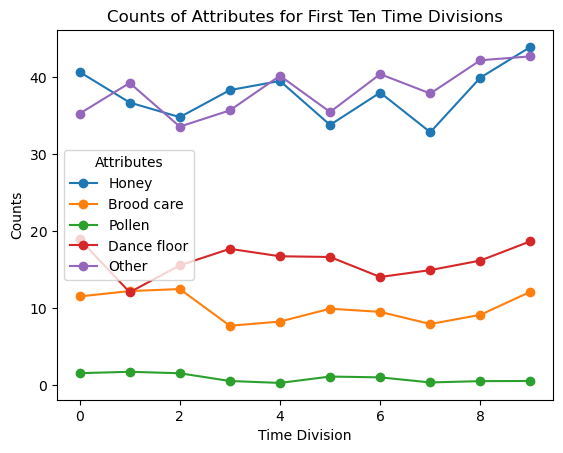

In [67]:
import matplotlib.pyplot as plt

# Subset the grouped data for the first ten 'timedivision' values
subset_grouped = state_distribution_permin.head(10)

# Create a line chart
subset_grouped[['Honey', 'Brood care', 'Pollen', 'Dance floor', 'Other']].plot(kind='line', marker='o')
# subset_grouped[['Frame 0', 'Frame 1', 'Frame 2', 'Frame 3', 'Frame 4', 'Frame 5']].plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Time Division')
plt.ylabel('Counts')
plt.title('Counts of Attributes for First Ten Time Divisions')
plt.legend(title='Attributes')

# Show the plot
plt.show()

In [68]:
subset_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10 entries, 0.0 to 9.0
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Honey        10 non-null     float64
 1   Brood care   10 non-null     float64
 2   Pollen       10 non-null     float64
 3   Dance floor  10 non-null     float64
 4   Other        10 non-null     float64
dtypes: float64(5)
memory usage: 480.0 bytes


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1435 entries, 5.0 to 1439.0
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Honey              1435 non-null   float64
 1   Brood care         1435 non-null   float64
 2   Pollen             1435 non-null   float64
 3   Dance floor        1435 non-null   float64
 4   Other              1435 non-null   float64
 5   Honey_lag_1        1435 non-null   float64
 6   Honey_lag_2        1435 non-null   float64
 7   Honey_lag_3        1435 non-null   float64
 8   Honey_lag_4        1435 non-null   float64
 9   Honey_lag_5        1435 non-null   float64
 10  Brood care_lag_1   1435 non-null   float64
 11  Brood care_lag_2   1435 non-null   float64
 12  Brood care_lag_3   1435 non-null   float64
 13  Brood care_lag_4   1435 non-null   float64
 14  Brood care_lag_5   1435 non-null   float64
 15  Pollen_lag_1       1435 non-null   float64
 16  Pollen_lag_2      

In [79]:
data=state_distribution_permin
# Feature Engineering: Create lag features
lag_periods = 5  # Choose an appropriate number of lag periods
lag_features = [f'{var}_lag_{i}' for var in columns_of_state for i in range(1, lag_periods+1)]
for feature in lag_features:
    data[feature] = data[feature.split('_')[0]].shift(int(feature.split('_')[2]))
data=data.iloc[lag_periods:]
# Split data into train and test sets (assuming a time-based split)
train_size = int(0.8 * len(data))
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Define input and output variables
X_train = train_data['timedivision'].values
y_train = train_data[columns_to_sum + lag_features].values

X_test = test_data['timedivision'].values
y_test = test_data[columns_to_sum + lag_features].values

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.7780422173992607e-28


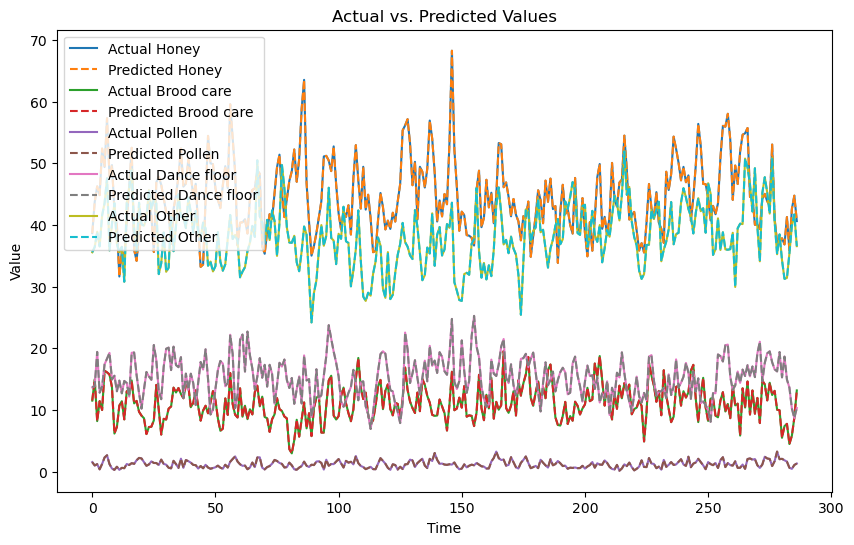

In [80]:
import matplotlib.pyplot as plt

# ... (previous code remains unchanged)

# Make predictions on test data
y_pred = model.predict(X_test)

# Create a line chart plot to compare predicted and actual values
plt.figure(figsize=(10, 6))

for i, column in enumerate(columns_of_state):
    plt.plot(y_test[:, i], label=f'Actual {column}')
    plt.plot(y_pred[:, i], linestyle='dashed', label=f'Predicted {column}')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [8]:
bees_trajectory_dir = "../../beetrajectories_days_000_to_049/"
df = pd.read_hdf(bees_trajectory_dir+"beetrajectories_049"+".hdf")
df.head()


,daynum,framenum,uid,x,y,camera,theta
0,49,3739,1978,2056,4911,0,2.71827
1,49,3740,1978,2056,4911,0,2.71156
2,49,3741,1978,2056,4911,0,2.63584
3,49,3742,1978,2056,4911,0,2.62675
4,49,3743,1978,1998,4871,0,-1.71517


In [10]:
unique_uids_per_day = df.groupby('framenum')['uid'].nunique()

# Print the result
print(unique_uids_per_day)

framenum
0         74
1         72
2         71
3         73
4         74
          ..
259195    75
259196    74
259197    59
259198    61
259199    60
Name: uid, Length: 259200, dtype: int64
